> В данном ноутбуке содержится полное **EDA**

In [ ]:
import re
from pymystem3 import Mystem
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import pandas as pd
import nltk

In [ ]:
df = pd.read_csv('/content/all_reviews.csv')

In [ ]:
df.columns

Index(['name', 'rating', 'review', 'review_mark'], dtype='object')

# **Чистка текста**

In [ ]:
import re
from pymystem3 import Mystem
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация pymystem3
mystem = Mystem()

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()

    # Удаление ссылок и спецсимволов
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)

    # Удаление чисел и пунктуации
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Лемматизация и удаление стоп-слов
    lemmas = mystem.lemmatize(text)
    words = [lemma for lemma in lemmas if lemma.strip() not in stop_words and lemma.strip()]

    return " ".join(words)

# Применение функции к каждому отзыву
df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Общие сведения**

In [ ]:
# Длина текста в словах
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Длина текста в символах
df['char_count'] = df['cleaned_review'].apply(len)

# Средняя длина слова
df['avg_word_length'] = df['char_count'] / df['word_count']

# Статистика длин текста
print(f"Средняя длина текста в словах: {df['word_count'].mean()}")
print(f"Минимальная длина текста: {df['word_count'].min()}")
print(f"Максимальная длина текста: {df['word_count'].max()}")


Средняя длина текста в словах: 22.960950330279918
Минимальная длина текста: 0
Максимальная длина текста: 725


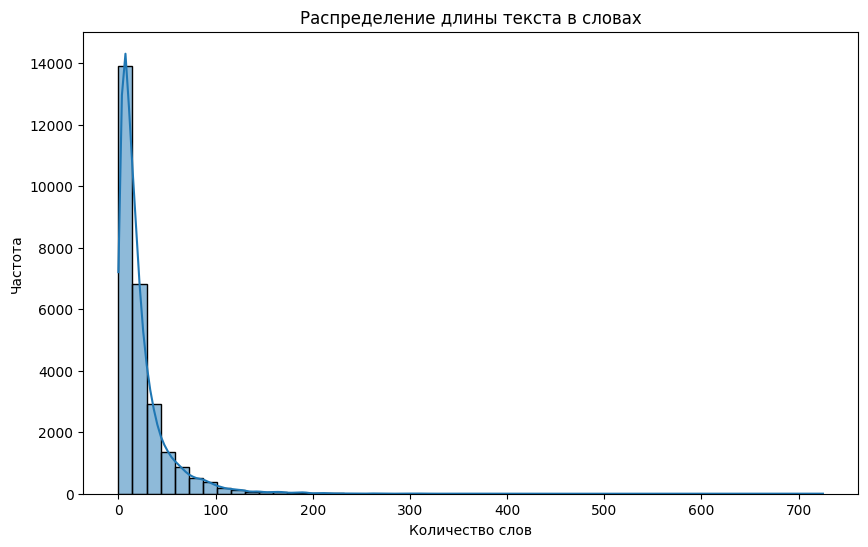

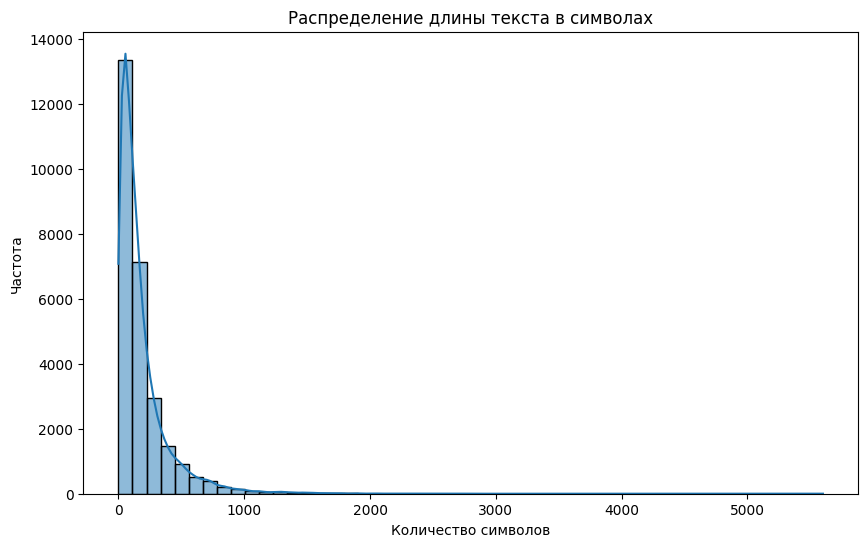

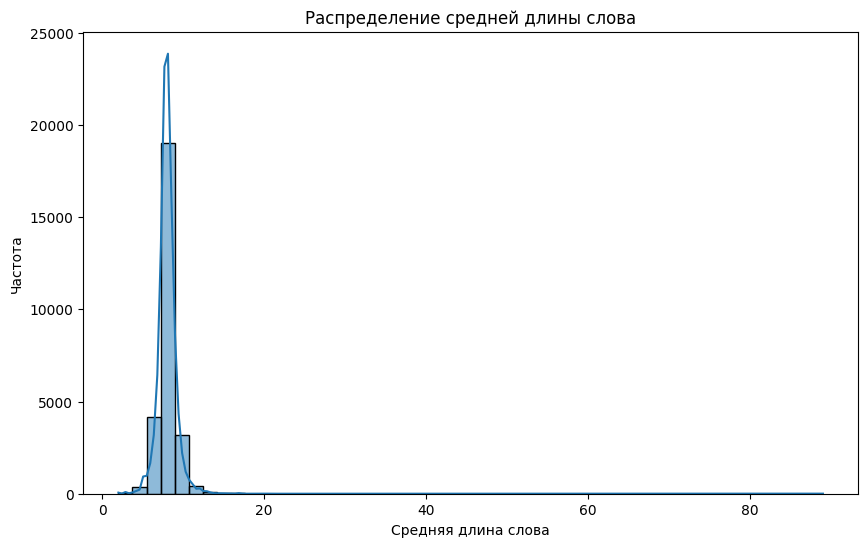

Средняя длина текста в словах: 22.960950330279918
Минимальная длина текста: 0
Максимальная длина текста: 725


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление длины текста в словах, символах и средней длины слова
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_review'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']

# Визуализация распределения длины текста в словах
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Распределение длины текста в словах')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.show()

# Визуализация распределения длины текста в символах
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=50, kde=True)
plt.title('Распределение длины текста в символах')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.show()

# Визуализация распределения средней длины слова
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_word_length'], bins=50, kde=True)
plt.title('Распределение средней длины слова')
plt.xlabel('Средняя длина слова')
plt.ylabel('Частота')
plt.show()

print(f"Средняя длина текста в словах: {df['word_count'].mean()}")
print(f"Минимальная длина текста: {df['word_count'].min()}")
print(f"Максимальная длина текста: {df['word_count'].max()}")


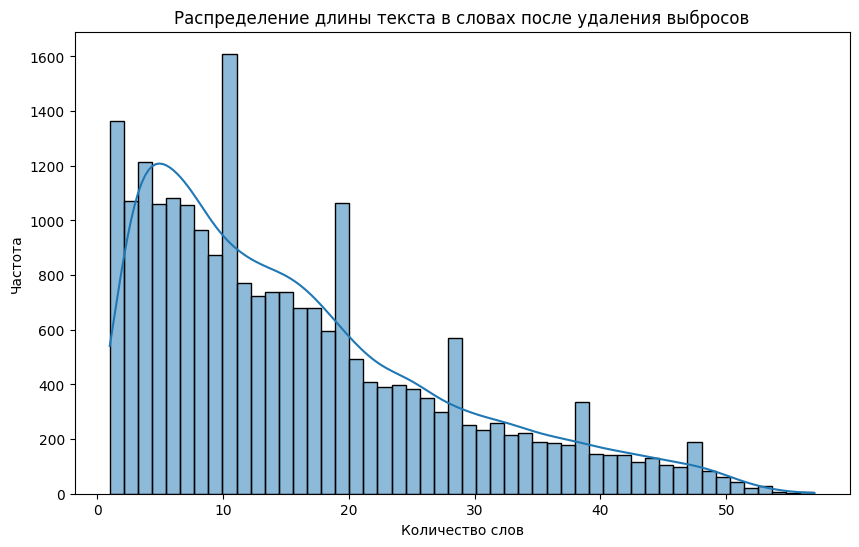

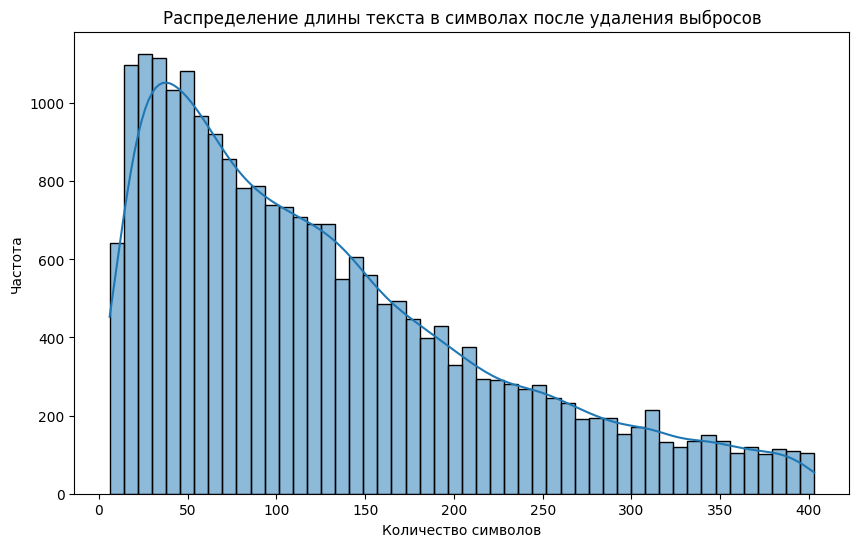

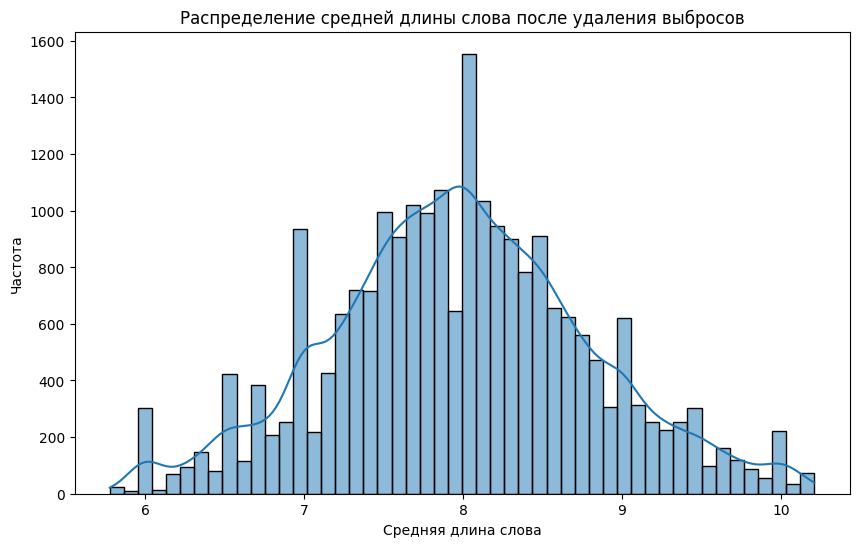

In [ ]:
# Функция для удаления выбросов на основе IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Определяем границы: 1.5*IQR ниже первого квартиля и выше третьего
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Фильтруем данные, оставляя только значения в пределах этих границ
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждой метрики
df_no_outliers = remove_outliers(df, 'word_count')
df_no_outliers = remove_outliers(df_no_outliers, 'char_count')
df_no_outliers = remove_outliers(df_no_outliers, 'avg_word_length')

# Визуализация данных после удаления выбросов
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['word_count'], bins=50, kde=True)
plt.title('Распределение длины текста в словах после удаления выбросов')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['char_count'], bins=50, kde=True)
plt.title('Распределение длины текста в символах после удаления выбросов')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['avg_word_length'], bins=50, kde=True)
plt.title('Распределение средней длины слова после удаления выбросов')
plt.xlabel('Средняя длина слова')
plt.ylabel('Частота')
plt.show()


# **частотный анализ слов и n-грамм, извлечение биграмм и триграмм**

In [ ]:
from nltk.util import ngrams
from collections import Counter

# Извлечение unigram, bigram и trigram
df['unigrams'] = df['cleaned_review'].apply(lambda x: x.split())
df['bigrams'] = df['cleaned_review'].apply(lambda x: list(ngrams(x.split(), 2)))
df['trigrams'] = df['cleaned_review'].apply(lambda x: list(ngrams(x.split(), 3)))

# Частотный анализ топ-20 униграмм
unigram_counts = Counter([word for words in df['unigrams'] for word in words])
print("Топ 20 униграмм:", unigram_counts.most_common(20))

# Частотный анализ топ-10 биграмм и триграмм
bigram_counts = Counter([bigram for bigrams in df['bigrams'] for bigram in bigrams])
trigram_counts = Counter([trigram for trigrams in df['trigrams'] for trigram in trigrams])

print("Топ 10 биграмм:", bigram_counts.most_common(10))
print("Топ 10 триграмм:", trigram_counts.most_common(10))


Топ 20 униграмм: [('номер', 21642), ('отель', 11710), ('очень', 11208), ('хороший', 7876), ('завтрак', 7340), ('персонал', 5954), ('гостиница', 5487), ('это', 5355), ('весь', 5126), ('отличный', 4149), ('чисто', 3892), ('чистый', 3684), ('место', 3559), ('понравиться', 3190), ('расположение', 3083), ('удобный', 3035), ('цена', 2816), ('день', 2717), ('этаж', 2668), ('кровать', 2659)]
Топ 10 биграмм: [(('хороший', 'отель'), 1117), (('очень', 'понравиться'), 1009), (('шведский', 'стол'), 1005), (('номер', 'чистый'), 997), (('отличный', 'отель'), 910), (('удобный', 'расположение'), 844), (('очень', 'хороший'), 755), (('вежливый', 'персонал'), 723), (('чисто', 'уютно'), 706), (('постельный', 'белье'), 706)]
Топ 10 триграмм: [(('завтрак', 'шведский', 'стол'), 393), (('оставлять', 'желать', 'хороший'), 161), (('очень', 'хороший', 'отель'), 157), (('соотношение', 'цена', 'качество'), 143), (('номер', 'весь', 'необходимый'), 121), (('очень', 'удобный', 'расположение'), 119), (('номер', 'чистый

# **статистики по символам и словам, распределение частей речи**

In [ ]:
from pymystem3 import Mystem
from collections import Counter

# Инициализация Mystem
mystem = Mystem()

# Функция для извлечения частей речи с помощью Mystem
def get_pos_mystem(text):
    analysis = mystem.analyze(text)
    pos_tags = [item['analysis'][0]['gr'].split(',')[0] if 'analysis' in item and item['analysis'] else 'UNK' for item in analysis]
    return pos_tags

# Применение функции и создание новой колонки с метками частей речи
df['pos_tags_mystem'] = df['cleaned_review'].apply(get_pos_mystem)

# Собираем все части речи в один список для подсчета
all_pos_tags = [tag for tags in df['pos_tags_mystem'] for tag in tags if tag != 'UNK']

# Подсчет количества слов каждой части речи
pos_counts = Counter(all_pos_tags)

# Переименование частей речи для более читабельного вывода
pos_names = {
    'S': 'Существительные',
    'A': 'Прилагательные',
    'V': 'Глаголы',
    'ADV': 'Наречия',
    'ADVPRO': 'Местоименные наречия',
    'SPRO': 'Местоимения',
    'ANUM': 'Порядковые числительные',
    'NUM': 'Числительные',
    'CONJ': 'Союзы',
    'PART': 'Частицы',
    'INTJ': 'Междометия',
    'APRO': 'Прилагательные местоимения',
    'PR': 'Предлоги',
    'COM': 'Сравнительные'
}

# Вывод количества слов каждой части речи только для тех, что есть в словаре
print("Распределение частей речи:")
for pos, count in pos_counts.items():
    if pos in pos_names:  # Проверяем, что часть речи есть в словаре pos_names
        pos_name = pos_names[pos]
        print(f"{pos_name}: {count}")


Распределение частей речи:
Существительные: 298444
Глаголы: 98005
Местоимения: 8210
Наречия: 6325
Прилагательные: 2658
Частицы: 95
Прилагательные местоимения: 8
Местоименные наречия: 108


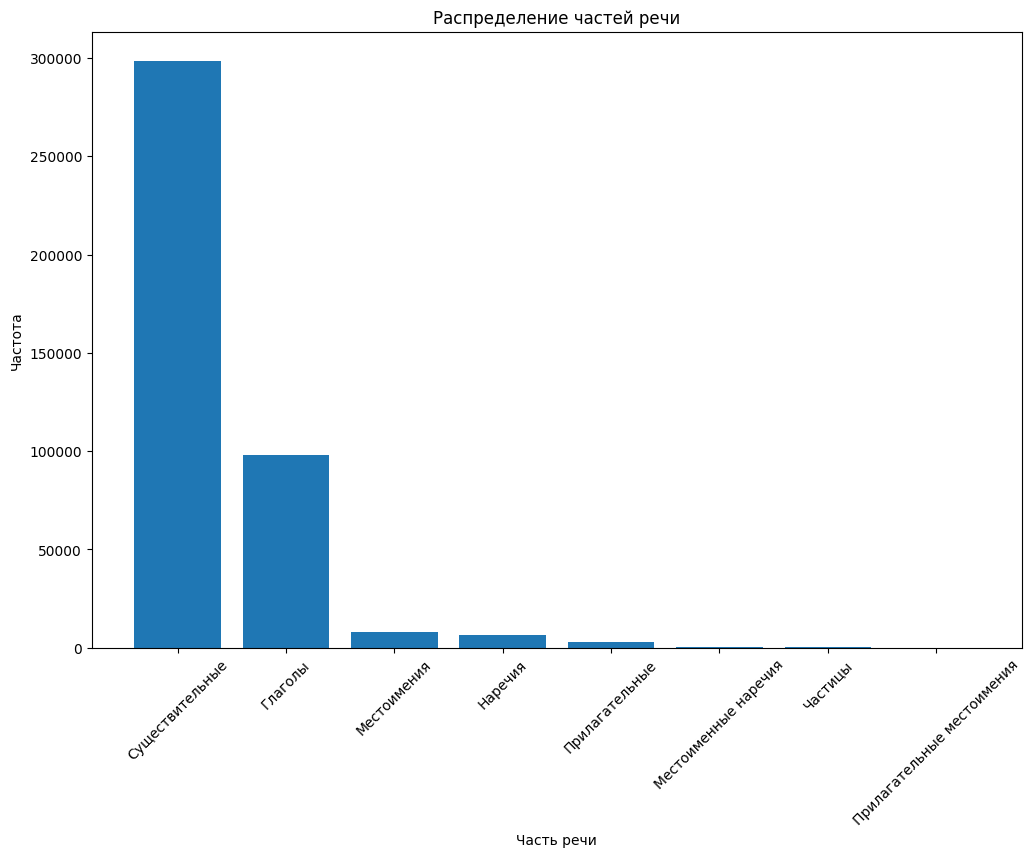

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


filtered_pos_counts = {pos_names[pos]: count for pos, count in pos_counts.items() if pos in pos_names}

pos_df = pd.DataFrame(list(filtered_pos_counts.items()), columns=['Часть речи', 'Частота'])

# Построение графика распределения частей речи
plt.figure(figsize=(12, 8))
pos_df.sort_values(by='Частота', ascending=False, inplace=True)
plt.bar(pos_df['Часть речи'], pos_df['Частота'])
plt.xticks(rotation=45)
plt.title('Распределение частей речи')
plt.xlabel('Часть речи')
plt.ylabel('Частота')
plt.show()


# **связь текстовых признаков с целевой переменной**

In [ ]:
# Корреляционная матрица
correlation_matrix = df_features.corr()

# Вывод корреляции признаков с целевой переменной (рейтингом)
print("Корреляция текстовых признаков с рейтингом отеля:")
print(correlation_matrix['rating'].sort_values(ascending=False))


Корреляция текстовых признаков с рейтингом отеля:
rating             1.000000
avg_word_length    0.018447
pos_A              0.010679
pos_ADVPRO        -0.004564
pos_PART          -0.010571
char_count        -0.024056
pos_S             -0.024818
word_count        -0.026383
pos_SPRO          -0.029992
pos_ADV           -0.043709
pos_V             -0.059387
pos_ANUM                NaN
pos_NUM                 NaN
pos_CONJ                NaN
Name: rating, dtype: float64


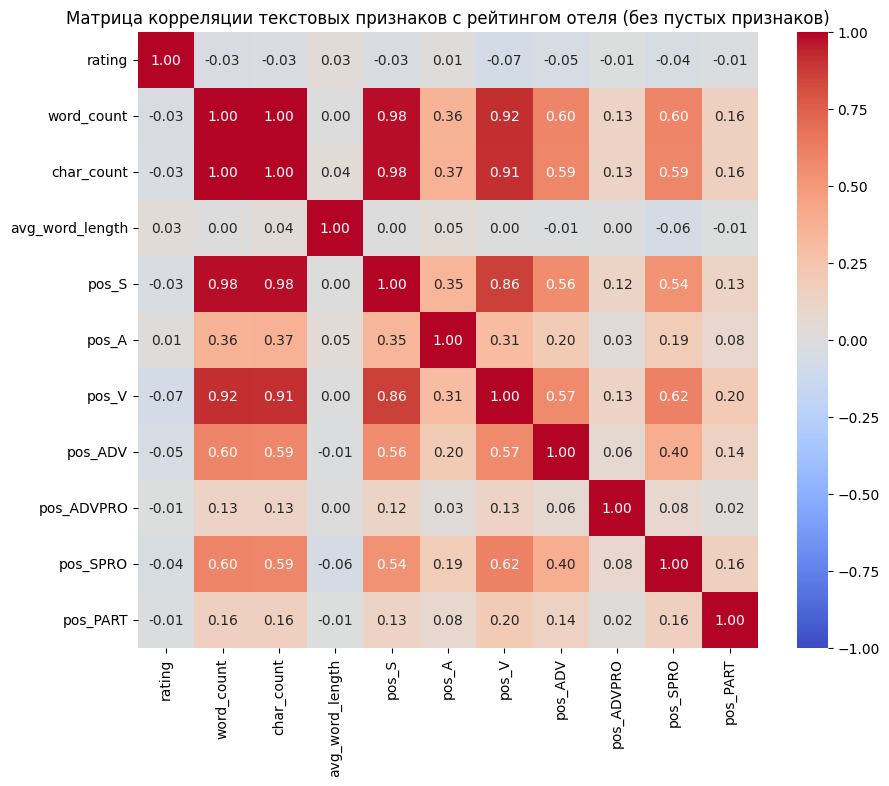

In [ ]:

# Создание матрицы корреляций
correlation_matrix = df_features.corr()

# Исключаем пустые признаки из корреляционной матрицы
correlation_matrix_filtered = correlation_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Построение тепловой карты корреляций без пустых признаков
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Матрица корреляции текстовых признаков с рейтингом отеля (без пустых признаков)')
plt.show()

**Выводы**
Глаголы (pos_V): Имеют наибольшую отрицательную корреляцию с рейтингом (-0.072). Отзывы с большим количеством глаголов чаще ассоциируются с низкими рейтингами, возможно, из-за более описательных и критичных сообщений в негативных отзывах.

**Но!**
**Корреляция текстовых признаков с рейтингом настолько мала, что можно утверждать, что линейная связь между текстовыми характеристиками и рейтингом практически отсутствует**

In [ ]:
# Средние значения текстовых признаков по разным уровням рейтинга
rating_groups = df_features.groupby('rating').mean()

# Вывод средних значений для анализа
print("Средние значения текстовых признаков по рейтингам отеля:")
print(rating_groups)



#TODO можно делитнуть вообще

Средние значения текстовых признаков по рейтингам отеля:
        word_count  char_count  avg_word_length      pos_S     pos_A  \
rating                                                                 
3.0      26.574575  210.997998         7.842207  12.824825  0.087087   
4.0      23.359426  187.008766         8.017096  11.021606  0.093598   
5.0      22.424184  180.376729         8.029975  10.666821  0.100205   

           pos_V   pos_ADV  pos_ADVPRO  pos_SPRO  pos_ANUM  pos_NUM  pos_CONJ  \
rating                                                                          
3.0     4.858859  0.323323    0.005005  0.381381       0.0      0.0       0.0   
4.0     3.856725  0.253786    0.004162  0.315859       0.0      0.0       0.0   
5.0     3.282613  0.207558    0.003706  0.282084       0.0      0.0       0.0   

        pos_PART  
rating            
3.0     0.006006  
4.0     0.003985  
5.0     0.002912  


# **Визуализация данных: ○ распределения классов, меток или числовых признаков; ○ облако наиболее частотных слов и биграмм для выявления ключевых тем (Word Clouds); ○ методы снижения размерности (например, t-SNE) для визуализации текстовых представлений.**

<ipython-input-47-ba0df41ef113>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_features, palette="viridis")


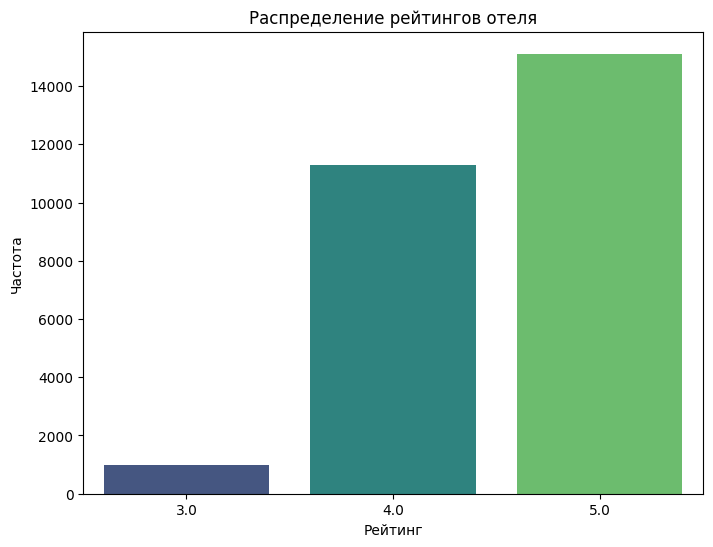

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import pandas as pd

# 1. Визуализация распределения рейтингов (классов)
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_features, palette="viridis")
plt.title('Распределение рейтингов отеля')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()


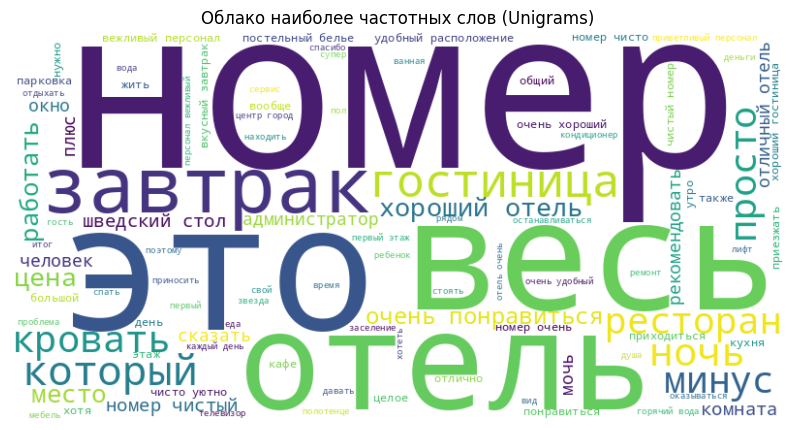

In [ ]:
# Объединяем все тексты для анализа частотности
all_text = ' '.join(df['cleaned_review'])

# Облако слов (Unigrams)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако наиболее частотных слов (Unigrams)')
plt.show()


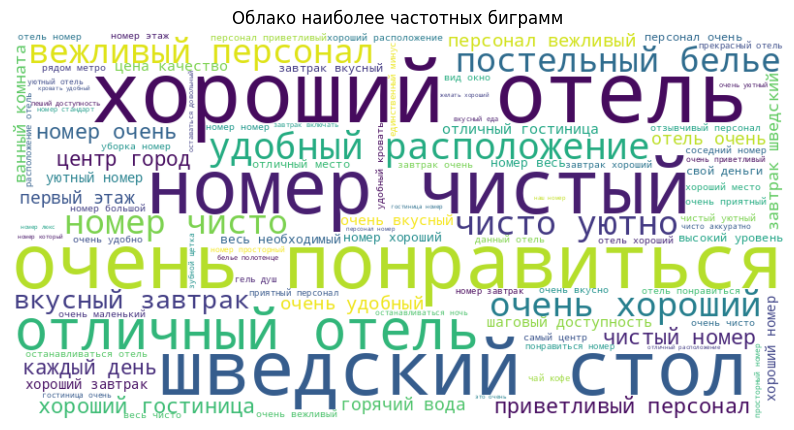

In [ ]:
# Облако слов для биграмм
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
X_bigrams = vectorizer.fit_transform(df['cleaned_review'])
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), X_bigrams.toarray().sum(axis=0)))
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq)

plt.figure(figsize=(10, 6))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако наиболее частотных биграмм')
plt.show()


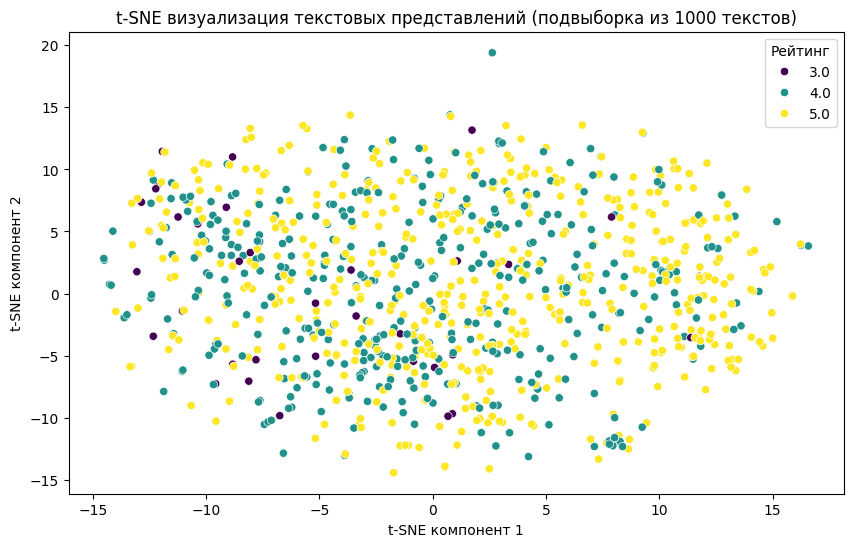

In [ ]:


# Случайная подвыборка из 1000 текстов для ускорения t-SNE
df_sample = df.sample(n=1000, random_state=0)

# Применение CountVectorizer к подвыборке
vectorizer = CountVectorizer(max_features=500)
X_text_sample = vectorizer.fit_transform(df_sample['cleaned_review'])

# Применение t-SNE для подвыборки
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
X_tsne_sample = tsne.fit_transform(X_text_sample.toarray())

# Визуализация t-SNE с цветом по рейтингу для подвыборки
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_sample[:, 0], y=X_tsne_sample[:, 1], hue=df_sample['rating'].round(), palette="viridis", legend="full")
plt.title('t-SNE визуализация текстовых представлений (подвыборка из 1000 текстов)')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.legend(title='Рейтинг')
plt.show()



Этот график показывает, что тексты отзывов с разными рейтингами не имеют ярко выраженных различий на уровне лексического содержания. Это может означать, что для более точного предсказания рейтинга на основе текста нужны дополнительные текстовые признаки (например, тональность) или более сложные модели, такие как нейронные сети, которые могут выявить более сложные взаимосвязи.


In [ ]:
# решили проверить наличие слова цена и его влияние на рейтинг

# Создаем булеву переменную, указывающую наличие слова "цена" в каждом отзыве
df['contains_price'] = df['cleaned_review'].apply(lambda x: 1 if 'цена' in x else 0)

# Вычисляем корреляцию между наличием слова "цена" и рейтингом
correlation, p_value = pearsonr(df['contains_price'], df['rating'])

# Вывод корреляции и p-value для проверки значимости
correlation, p_value


(-0.08239820632120093, 1.707634316195729e-42)

Наличие слова "цена" в отзыве связано с небольшим понижением рейтинга, однако эта связь не является значимой для практического применения из-за её слабости.

In [ ]:
# Определение высокого и низкого рейтинга
high_rating_reviews = df[df['rating'] >= 4]['cleaned_review']
low_rating_reviews = df[df['rating'] <= 3.5]['cleaned_review']

# Функция для получения топ-10 популярных слов
def get_top_words(reviews, n=10):
    if len(reviews) == 0:  # Проверка на пустой список
        return []
    vectorizer = CountVectorizer(max_features=1000, stop_words=list(stop_words))
    X = vectorizer.fit_transform(reviews)
    word_counts = X.toarray().sum(axis=0)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_words

# Получаем топ-10 популярных слов для высокого и низкого рейтинга
top_words_high_rating = get_top_words(high_rating_reviews)
top_words_low_rating = get_top_words(low_rating_reviews)

top_words_high_rating, top_words_low_rating

([('номер', 20144),
  ('отель', 11388),
  ('очень', 10622),
  ('хороший', 7562),
  ('завтрак', 7248),
  ('персонал', 5658),
  ('гостиница', 5006),
  ('это', 4872),
  ('весь', 4783),
  ('отличный', 4034)],
 [('номер', 1071),
  ('гостиница', 445),
  ('очень', 366),
  ('это', 329),
  ('весь', 224),
  ('хороший', 182),
  ('персонал', 181),
  ('отель', 170),
  ('метро', 159),
  ('цена', 159)])

разницы особо нет между топ-10 популярных слов для высокого и низкого рейтинга



# **Вывод о структуре данных, их особенностях и потенциальных проблемах на основе проведенного разведочного анализа данных.**

 **Дисбаланс классов: Большинство отзывов имеют высокие рейтинги (4 и 5), что может усложнить предсказание низких оценок и требует балансировки данных.**

 **Слабая корреляция признаков с рейтингом: Текстовые признаки (например, количество слов, частота частей речи) не показывают значимой корреляции с рейтингом. Это указывает на отсутствие явных линейных связей между лексическим содержанием отзывов и их оценками.**

 **Лексическое сходство отзывов: Облако слов и t-SNE визуализация показывают, что отзывы с разными оценками имеют схожий словарный запас и не образуют чётких кластеров, что затрудняет определение оценки на основе только лексики.**